***RODOLFO VALIENTE ROMERO***

#**HW 1**

** *Code is based on course notes and was used code from the Colab examples**

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.

## Load and Explore data

### Loading the MNIST digits data set

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


### Exploring the format of the MNIST digits data set

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_images.ndim

3

In [0]:
train_labels

In [6]:
train_labels.shape

(60000,)

### Displaying MNIST digits

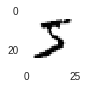

In [7]:
import matplotlib.pyplot as plt
digit_0 = train_images[0]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [0]:
digit_0.shape

In [0]:
label_0 = train_labels[0]
label_0

## Problem 1

Use logistic regression with mean squared error loss.

## Problem 2

Use logistic regression with binary cross entropy loss.

## Problem 3

- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

## Problem 4

Reimplement the network from Problem 3 entirely in Keras.

## Problem 5

Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).